In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [53]:
loan = pd.read_csv("train_ctrUa4K.csv",index_col=False)

In [54]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
loan.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [8]:
loan.Gender = loan.Gender.fillna("Male")

In [9]:
loan.Married.value_counts()
loan.Married = loan.Married.fillna("Yes")

In [10]:
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
loan.Dependents = loan.Dependents.replace(0,'0')
loan.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [12]:
loan.Self_Employed.value_counts()
loan.Self_Employed = loan.Self_Employed.fillna("No")

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

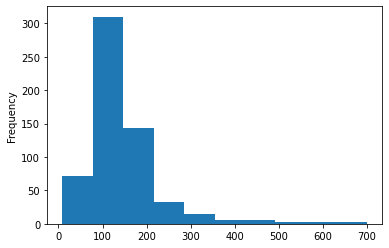

In [13]:
loan.LoanAmount.plot(kind = 'hist')
loan.LoanAmount.describe()

<AxesSubplot:>

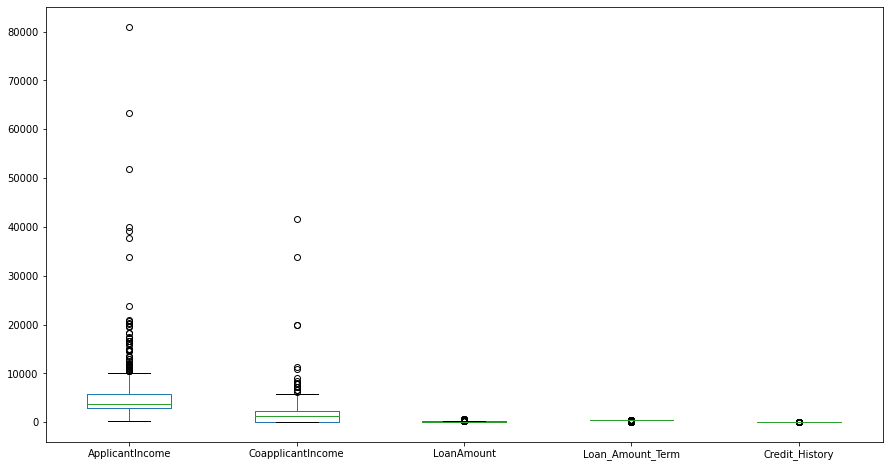

In [14]:
loan.plot(kind = "box", figsize = (15,8))

In [15]:
loan.LoanAmount.median()
loan.LoanAmount = loan.LoanAmount.fillna(125.0)

In [16]:
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

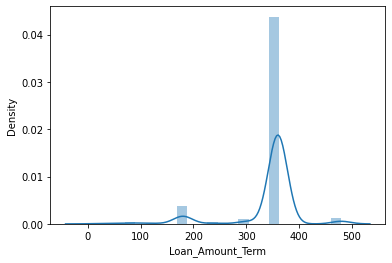

In [17]:
sns.distplot(loan.Loan_Amount_Term )

In [18]:
loan["status"] = np.where(loan.Loan_Status == "Y",1,0)

In [19]:
loan.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'status'],
      dtype='object')

In [20]:
loan.groupby("Loan_Status")["Gender"].count().reset_index()

,Loan_Status,Gender
0,N,192
1,Y,422


In [21]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  status             614 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(8)
memory usage: 64.9+ KB


In [22]:
numeric_col = []
for i in loan.columns:
    if loan[i].dtype == 'float':
        numeric_col.append(i)
print(numeric_col)        

['CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
cat_var = ["Gender","Married","Education","Self_Employed","Property_Area"]
for i in cat_var:
    loan[i] = le.fit_transform(loan[i])

In [25]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,status
0,LP001002,1,0,0,0,0,5849,0.0,125.0,360.0,1.0,2,Y,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,N,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,Y,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,Y,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,Y,1


In [26]:
loan = loan.drop(columns = ["Loan_Status","Loan_ID"])

In [27]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,status
0,1,0,0,0,0,5849,0.0,125.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [28]:
loan["Dependents"] = loan["Dependents"].fillna("0")

In [29]:
loan["Dependents"] = np.where(loan["Dependents"]=="3+",3,loan["Dependents"])

In [30]:
loan["Dependents"].value_counts()

0    360
1    102
2    101
3     51
Name: Dependents, dtype: int64

In [31]:
loan["Loan_Amount_Term"]=loan["Loan_Amount_Term"].fillna(360)

In [32]:
loan.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
status                0
dtype: int64

<AxesSubplot:>

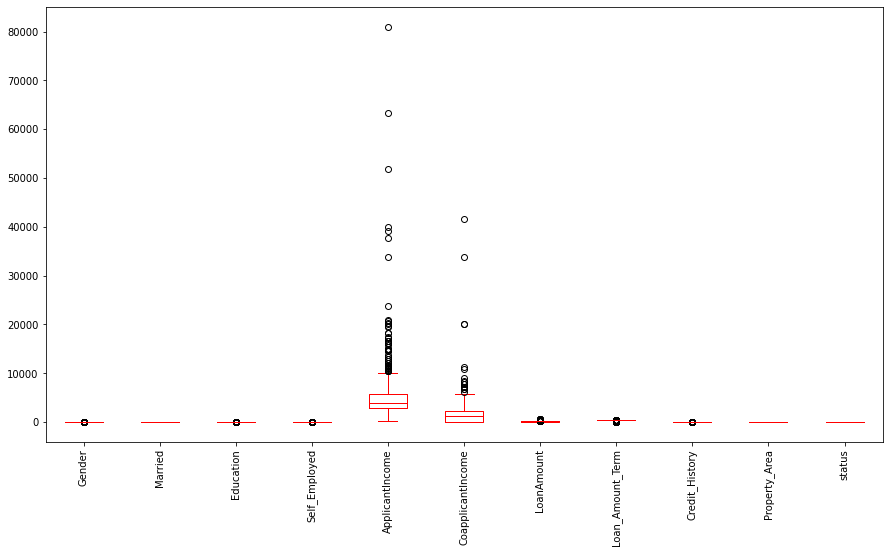

In [33]:
loan.boxplot(figsize = (15,8,),rot = 90,grid = False,color = "red")

In [34]:
loan["Income"] = loan.ApplicantIncome + loan.CoapplicantIncome

In [35]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,status,Income
0,1,0,0,0,0,5849,0.0,125.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [36]:
loan = loan.drop(columns = ["ApplicantIncome","CoapplicantIncome"])

In [37]:
loan.Income=loan.Income[loan.Income <= 40000]

<AxesSubplot:>

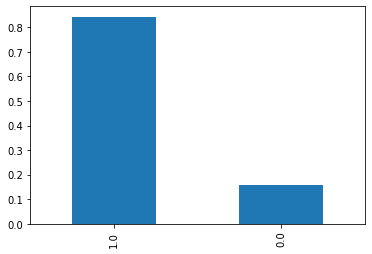

In [38]:
loan.Credit_History.value_counts(normalize=True).plot(kind = "bar")

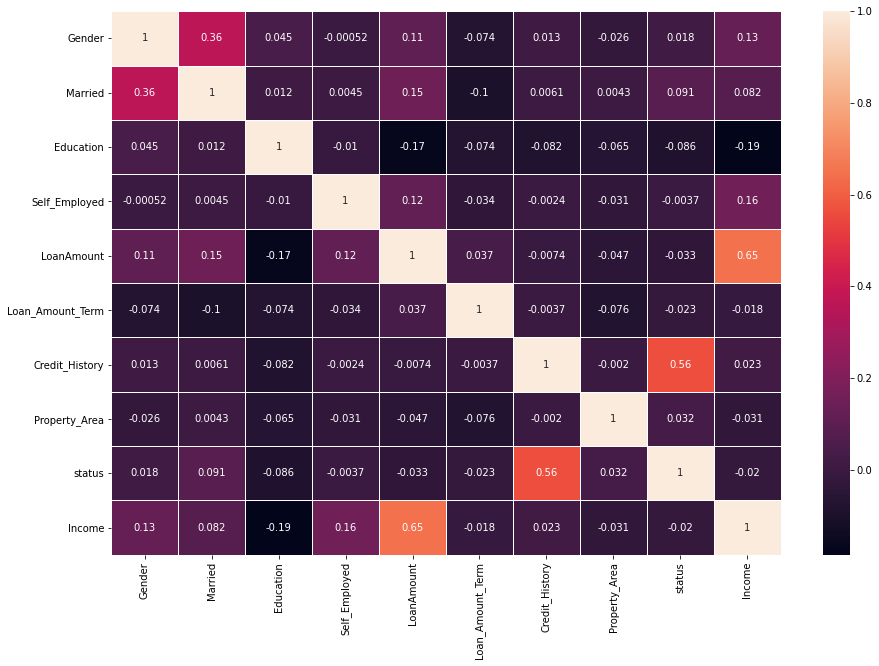

In [39]:
plt.figure(figsize=(15,10))
sns.heatmap(loan.corr(),annot = True,linewidth = 1)
plt.show()

In [40]:
loan.Credit_History = loan.Credit_History.fillna(loan.Credit_History.mode()[0])

In [41]:
loan.Income = loan.Income.fillna(loan.Income.mean())

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score

In [43]:
X = loan.drop(columns = "status")
Y = loan.status

In [44]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,0,0,0,0,125.0,360.0,1.0,2,5849.0
1,1,1,1,0,0,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,1,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,0,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,0,141.0,360.0,1.0,2,6000.0


In [45]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: status, dtype: int32

In [46]:
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.3)

In [47]:
train_x.shape,test_x.shape

((429, 10), (185, 10))

In [48]:
train_y.head()

276    1
69     0
253    1
80     1
66     0
Name: status, dtype: int32

In [49]:
tree = DecisionTreeClassifier()
tree.fit(train_x,train_y)
pred = tree.predict(test_x)
accuracy_score(test_y,pred)

0.6972972972972973

In [50]:
svm = SVC()
svm.fit(train_x,train_y)
pred = svm.predict(test_x)
accuracy_score(test_y,pred)

0.6972972972972973

In [51]:
rf = RandomForestClassifier()
rf.fit(train_x,train_y)
pred = rf.predict(test_x)
accuracy_score(test_y,pred)

0.7837837837837838

In [72]:
grid = {
    "n_estimators":[int(x) for  x in np.linspace(1,1200,12)],
    "max_depth":[2,4,6,8,10],
    "min_samples_split":[int(x) for x in np.linspace(5,30,6)],
    "min_samples_leaf":[1,2,3,5,10]
}

In [69]:
from sklearn.model_selection import RandomizedSearchCV

In [74]:
rf_tuned.fit(train_x,train_y)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, 10],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30],
                                        'n_estimators': [1, 110, 219, 328, 437,
                                                         546, 655, 764, 873,
                                                         982, 1091, 1200]},
                   scoring='accuracy')

In [75]:
rf_tuned.best_params_

{'n_estimators': 437,
 'min_samples_split': 10,
 'min_samples_leaf': 5,
 'max_depth': 8}

In [78]:
pred_rf = rf_tuned.predict(test_x)
accuracy_score(test_y,pred_rf)

0.8054054054054054

In [166]:
test_loan = pd.read_csv("test_lAUu6dG.csv")

In [143]:
test_loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [144]:
test_loan.drop(columns = "Loan_ID",inplace = True)

In [145]:
test_loan.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [146]:
col = ["Gender","Dependents","Self_Employed","LoanAmount","Loan_Amount_Term","Credit_History"]


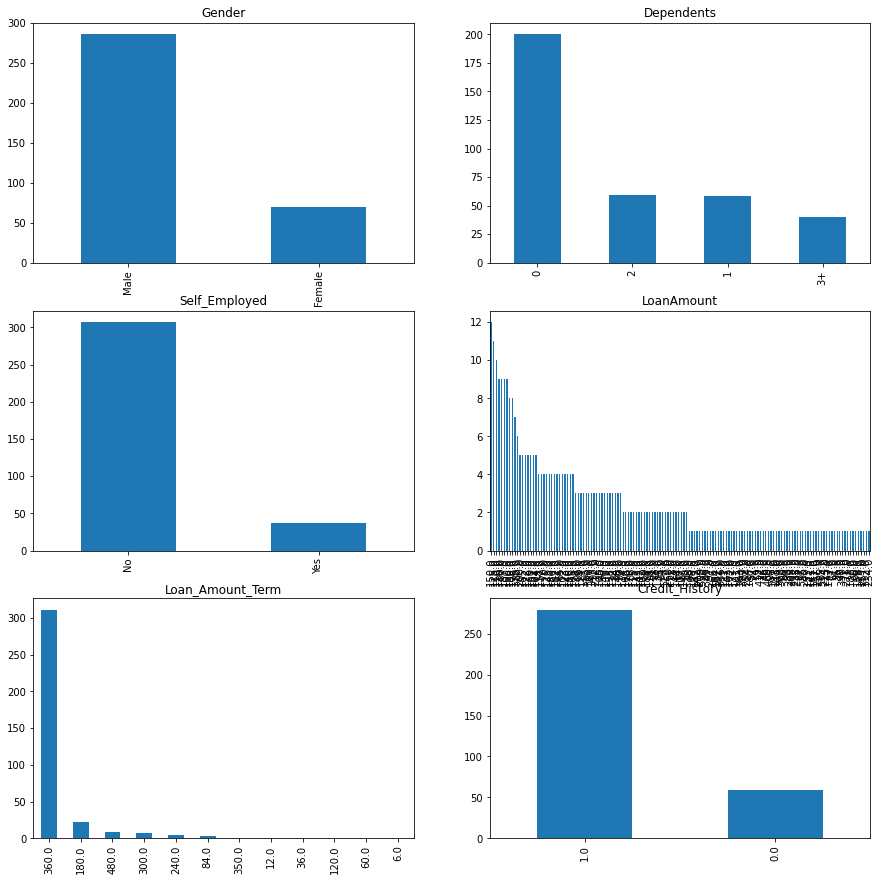

In [147]:
plt.figure(figsize=(15,15))
for i,j in enumerate(col):
    plt.subplot(3,2,i+1)    
    test_loan[j].value_counts().plot(kind= "bar")
    plt.title(j)
    

In [148]:
test_loan.Loan_Amount_Term.mode()[0]

360.0

In [149]:
test_loan.Gender.fillna(test_loan.Gender.mode()[0],inplace=True)
test_loan.Dependents.fillna(test_loan.Dependents.mode()[0],inplace=True)
test_loan.Self_Employed.fillna(test_loan.Self_Employed.mode()[0],inplace=True)
test_loan.Credit_History.fillna(test_loan.Credit_History.mode()[0],inplace=True)
test_loan.Loan_Amount_Term.fillna(test_loan.Loan_Amount_Term.mode()[0],inplace=True)
test_loan.LoanAmount.fillna(test_loan.LoanAmount.median(),inplace=True)

In [151]:
test_loan.Dependents.replace("3+",3,inplace=True)

In [152]:
test_loan.Dependents.value_counts()

0    210
2     59
1     58
3     40
Name: Dependents, dtype: int64

In [153]:
cat_var = ["Gender","Married","Education","Self_Employed","Property_Area"]
for i in cat_var:
    test_loan[i] = le.fit_transform(test_loan[i])

In [161]:
test_loan.drop(columns = ["ApplicantIncome","CoapplicantIncome"],inplace=True)

In [162]:
test_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,1,0,0,0,110.0,360.0,1.0,2,5720.0
1,1,1,1,0,0,126.0,360.0,1.0,2,4576.0
2,1,1,2,0,0,208.0,360.0,1.0,2,6800.0
3,1,1,2,0,0,100.0,360.0,1.0,2,4886.0
4,1,0,0,1,0,78.0,360.0,1.0,2,3276.0


In [154]:
test_loan["Income"] = test_loan.ApplicantIncome + test_loan.CoapplicantIncome
test_loan.drop(columns = ["ApplicantIncome","CoapplicantIncome"])

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,1,0,0,0,110.0,360.0,1.0,2,5720
1,1,1,1,0,0,126.0,360.0,1.0,2,4576
2,1,1,2,0,0,208.0,360.0,1.0,2,6800
3,1,1,2,0,0,100.0,360.0,1.0,2,4886
4,1,0,0,1,0,78.0,360.0,1.0,2,3276
...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,113.0,360.0,1.0,2,5786
363,1,1,0,0,0,115.0,360.0,1.0,2,4867
364,1,0,0,0,0,126.0,360.0,1.0,1,5243
365,1,1,0,0,0,158.0,360.0,1.0,0,7393


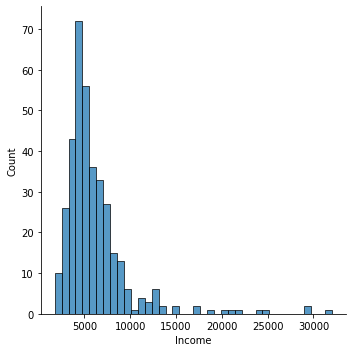

In [156]:
sns.displot(test_loan.Income)
plt.show()

In [155]:
test_loan["Income"] = test_loan.Income[test_loan.Income <= 40000]

In [159]:
test_loan.Income.fillna(test_loan.Income.median(),inplace=True)

In [163]:
pred_test = rf_tuned.predict(test_loan)

In [179]:
sub = pd.read_csv("sample_submission_49d68Cx.csv")
sub.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [180]:
sub.Loan_ID = test_loan.Loan_ID
sub.Loan_Status = pred_test

In [183]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [182]:
sub.Loan_Status.replace(1,"Y",inplace=True)
sub.Loan_Status.replace(0,"N",inplace=True)

In [184]:
pd.DataFrame(sub,columns=["Loan_ID","Loan_Status"]).to_csv("result_loan.csv")